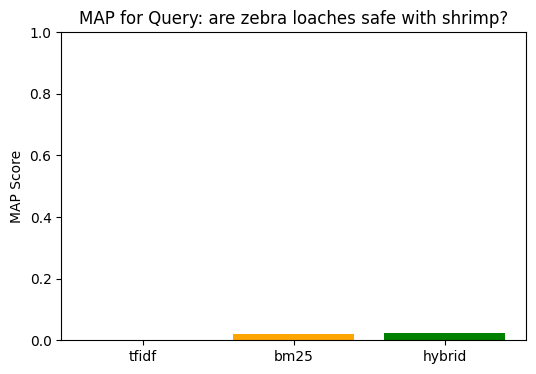

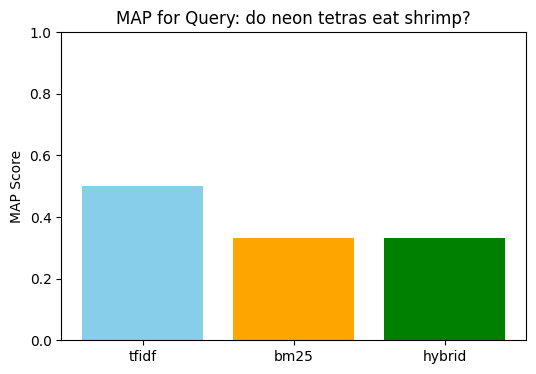

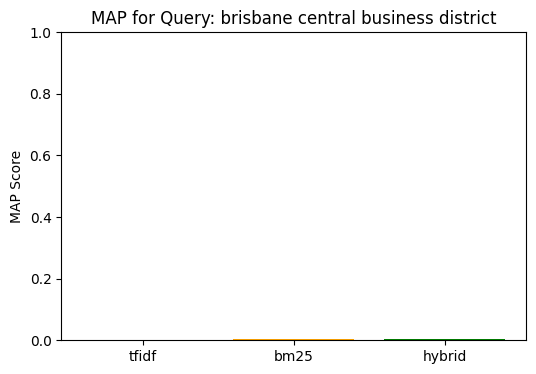

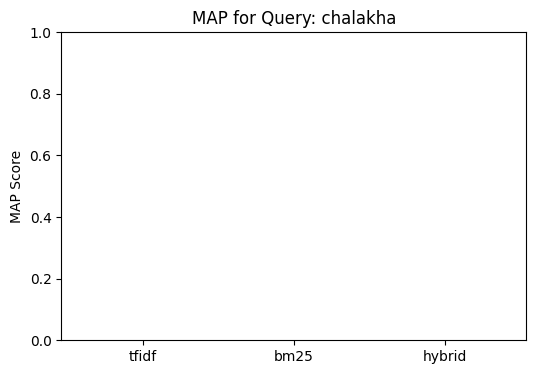

In [28]:
for dataset in results:
    for query in results[dataset]:
        methods = ["tfidf", "bm25", "hybrid"]
        scores = [results[dataset][query][m]["MAP"] for m in methods]

        plt.figure(figsize=(6, 4))
        plt.bar(methods, scores, color=["skyblue", "orange", "green"])
        plt.title(f"MAP for Query: {query}")
        plt.ylabel("MAP Score")
        plt.ylim(0, 1)
        plt.show()


In [27]:
for dataset in results:
    print(f"\n\n====== {dataset.upper()} RESULTS ======")
    for query in results[dataset]:
        print(f"\n--- Query: {query} ---")
        for method in results[dataset][query]:
            print(f"\n  >> Method: {method.upper()}")
            pprint(results[dataset][query][method])




====== LIFESTYLE RESULTS ======

--- Query: are zebra loaches safe with shrimp? ---

  >> Method: TFIDF
{'MAP': 0.0, 'MRR': 0.0, 'Precision@10': 0.0, 'Recall': 0.0}

  >> Method: BM25
{'MAP': 0.02, 'MRR': 0.1, 'Precision@10': 0.1, 'Recall': 0.2}

  >> Method: HYBRID
{'MAP': 0.0222, 'MRR': 0.1111, 'Precision@10': 0.1, 'Recall': 0.2}

--- Query: do neon tetras eat shrimp? ---

  >> Method: TFIDF
{'MAP': 0.5, 'MRR': 0.5, 'Precision@10': 0.1, 'Recall': 1.0}

  >> Method: BM25
{'MAP': 0.3333, 'MRR': 0.3333, 'Precision@10': 0.1, 'Recall': 1.0}

  >> Method: HYBRID
{'MAP': 0.3333, 'MRR': 0.3333, 'Precision@10': 0.1, 'Recall': 1.0}


====== WIKIR1K RESULTS ======

--- Query: brisbane central business district ---

  >> Method: TFIDF
{'MAP': 0.0, 'MRR': 0.0, 'Precision@10': 0.0, 'Recall': 0.0}

  >> Method: BM25
{'MAP': 0.005, 'MRR': 0.5, 'Precision@10': 0.1, 'Recall': 0.01}

  >> Method: HYBRID
{'MAP': 0.005, 'MRR': 0.5, 'Precision@10': 0.1, 'Recall': 0.01}

--- Query: chalakha ---

  >> Met

In [25]:
results = {}

for dataset, query_list in queries.items():
    results[dataset] = {}
    for query in query_list:
        results[dataset][query] = {}
        for method in ["tfidf", "bm25", "hybrid"]:
            print(f"Running {dataset} | {query} | {method}")
            output = evaluate_query(query_text=query, dataset=dataset, method=method)
            results[dataset][query][method] = output["evaluation"]


Running lifestyle | are zebra loaches safe with shrimp? | tfidf
Running lifestyle | are zebra loaches safe with shrimp? | bm25
Running lifestyle | are zebra loaches safe with shrimp? | hybrid
Running lifestyle | do neon tetras eat shrimp? | tfidf
Running lifestyle | do neon tetras eat shrimp? | bm25
Running lifestyle | do neon tetras eat shrimp? | hybrid
Running wikIR1k | brisbane central business district | tfidf
Running wikIR1k | brisbane central business district | bm25
Running wikIR1k | brisbane central business district | hybrid
Running wikIR1k | chalakha | tfidf
Running wikIR1k | chalakha | bm25
Running wikIR1k | chalakha | hybrid


In [24]:
queries = {
    "lifestyle": ["are zebra loaches safe with shrimp?", "do neon tetras eat shrimp?"],
    "wikIR1k": ["brisbane central business district", "chalakha"]
}


In [23]:
# ✅ الخلية 3: استعلامات تجريبية
queries = {
    "lifestyle": ["how to improve sleep quality", "healthy eating tips"],
    "wikIR1k": ["artificial intelligence applications", "covid 19 vaccine"]
}


In [22]:
# ✅ الخلية 2: تنفيذ استعلام على FastAPI
def evaluate_query(query_text, dataset="lifestyle", method="tfidf"):
    response = requests.get(f"{BASE_URL}/", params={
        "q": query_text,
        "dataset": dataset,
        "method": method
    })
    return response.json()


In [21]:
# ✅ الخلية 1: الاستيراد
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

BASE_URL = "http://127.0.0.1:8000"
